In [15]:
import sys
sys.path.append('../')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [2]:
image_dir = '../images'
merfish_dir = f'{image_dir}/u2os'

model_dir = './models'

In [3]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

# Flip/Rotation Augmenter

In [4]:
# Load from disk
fliprot_aug_merfish_model = StarDist2D(None, name='fliprot_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.496986, nms_thresh=0.3.


In [5]:
merfish_Y_pred = [fliprot_aug_merfish_model.predict_instances(x, n_tiles=fliprot_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [03:20<00:00, 25.11s/it]


In [6]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:23<00:00,  2.61s/it]


In [7]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7343216152664176, mean_matched_score=0.8096366527296399, panoptic_quality=0.7701421818647795, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7343216152664176, mean_matched_score=0.8096366527296399, panoptic_quality=0.7701421818647795, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7343216152664176, mean_matched_score=0.8096366527296399, panoptic_quality=0.7701421818647795, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=39, fn=4, preci

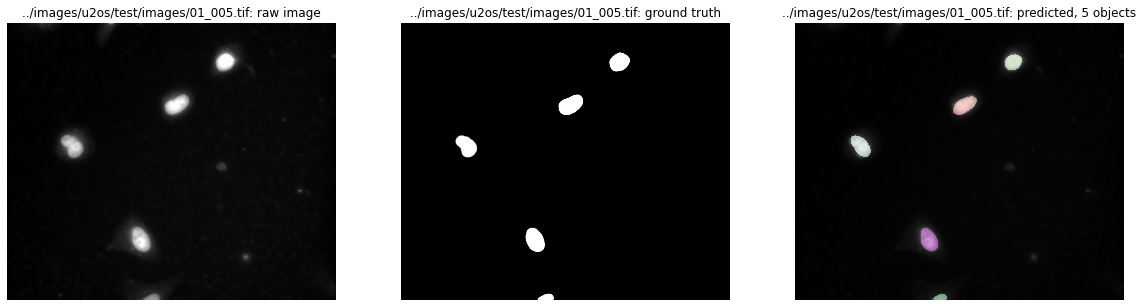

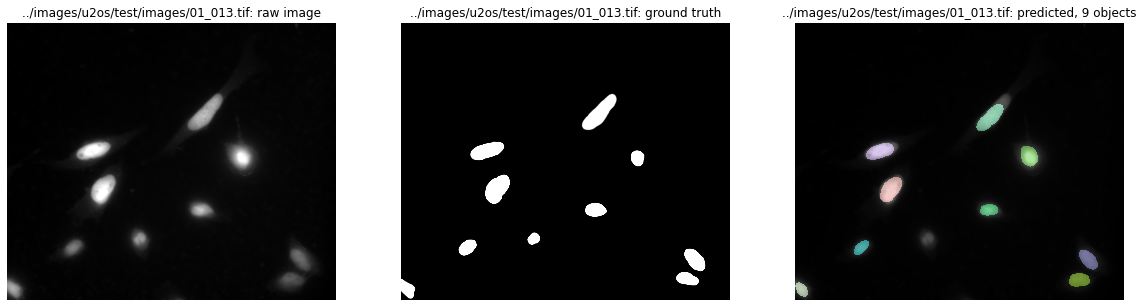

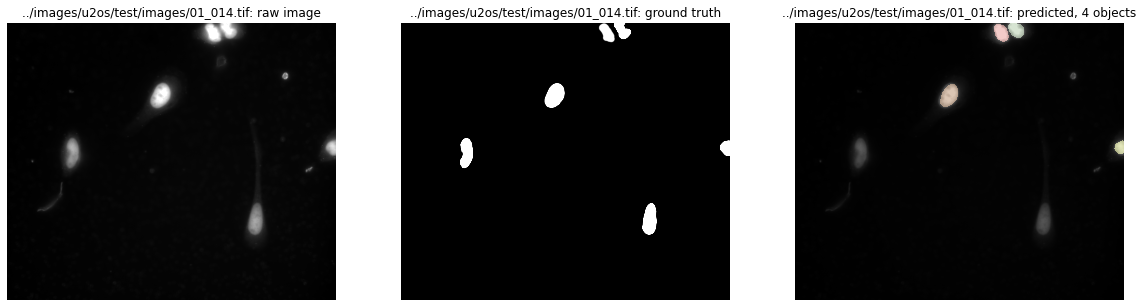

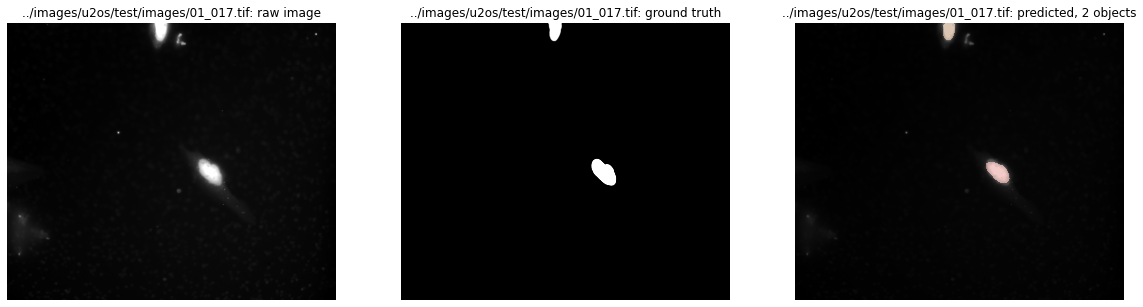

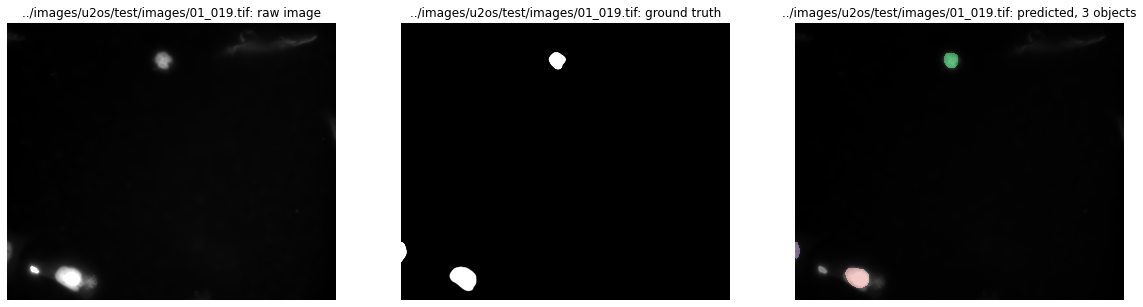

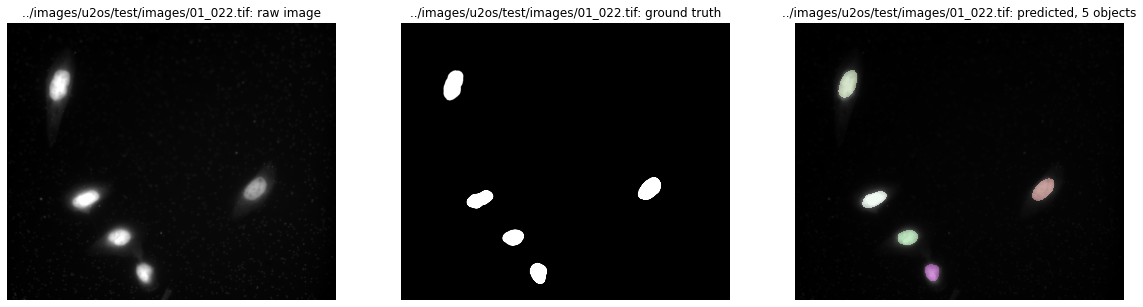

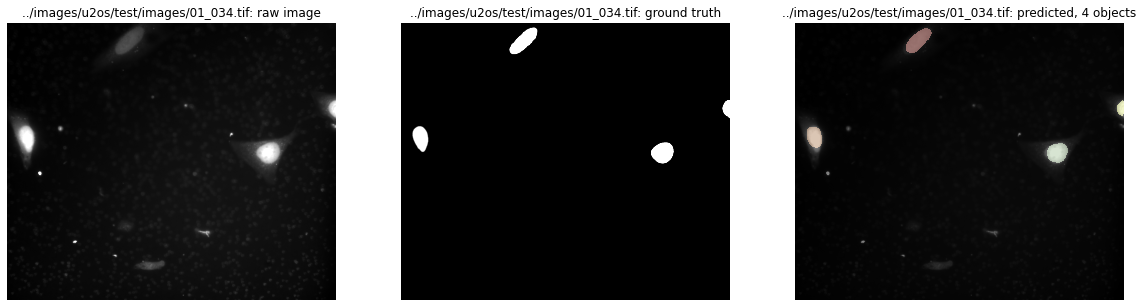

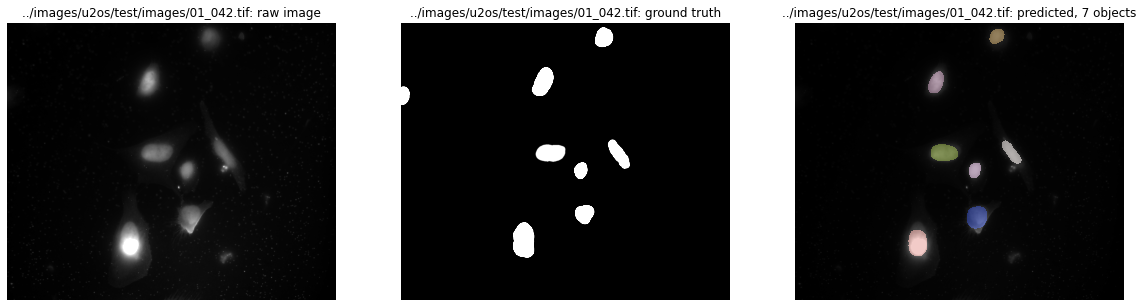

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [9]:
save_scores_csv(merfish_stats, '_fliprot')

# Intensity Augmenter

In [19]:
# Load from disk
intensity_aug_merfish_model = StarDist2D(None, name='intensity_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.681852, nms_thresh=0.3.


In [20]:
merfish_Y_pred = [intensity_aug_merfish_model.predict_instances(x, n_tiles=intensity_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [03:17<00:00, 24.73s/it]


In [21]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:21<00:00,  2.36s/it]


In [22]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7377353490995456, mean_matched_score=0.8134005131097555, panoptic_quality=0.7737224392995234, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7377353490995456, mean_matched_score=0.8134005131097555, panoptic_quality=0.7737224392995234, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7377353490995456, mean_matched_score=0.8134005131097555, panoptic_quality=0.7737224392995234, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=1, tp=38, fn=5, preci

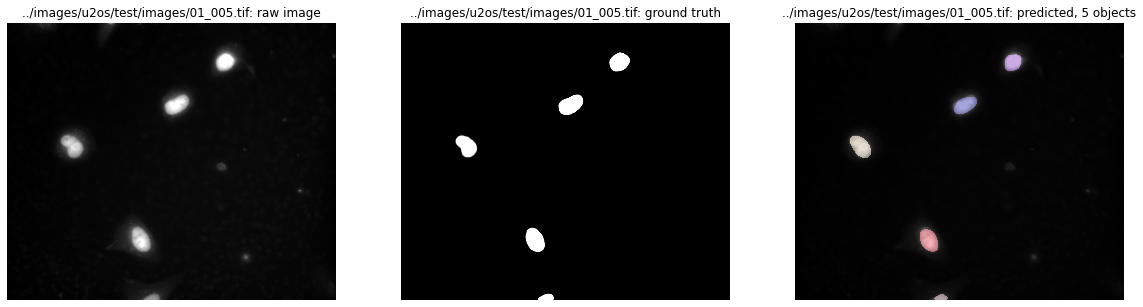

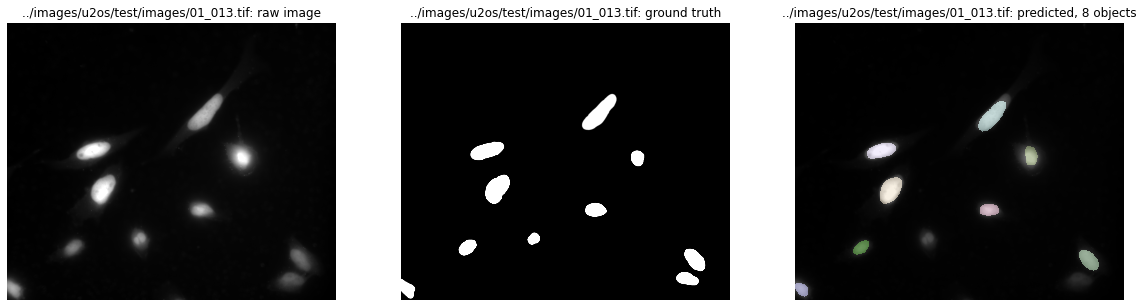

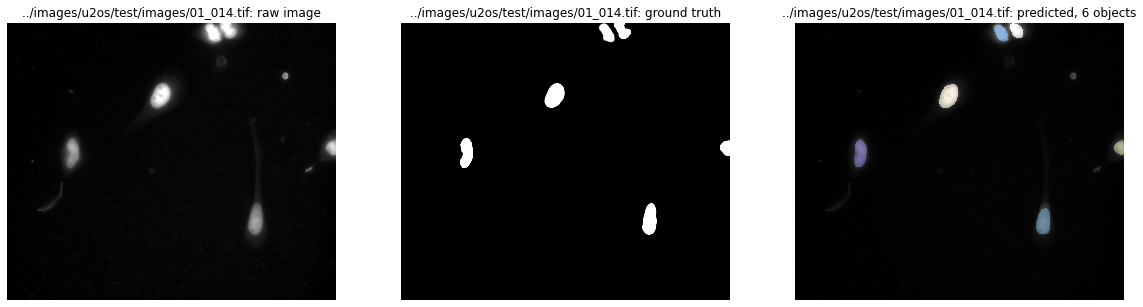

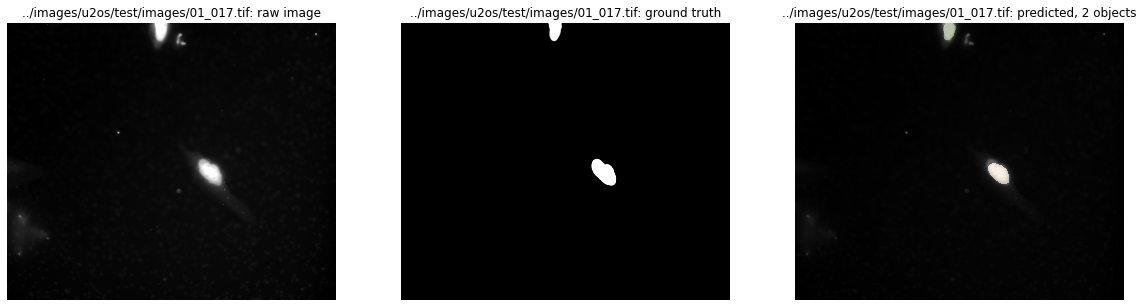

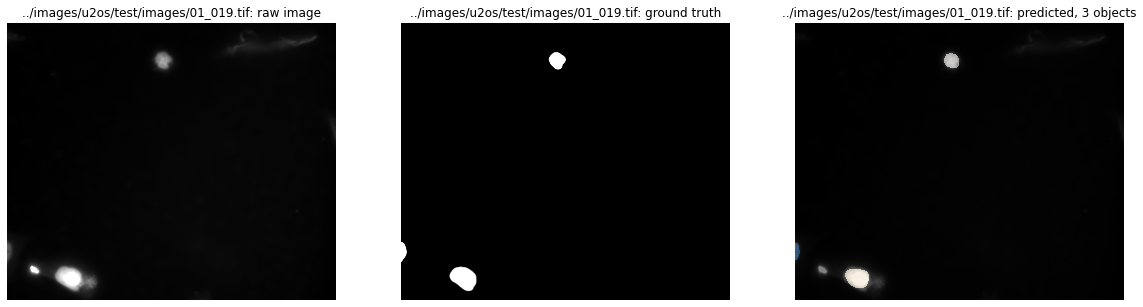

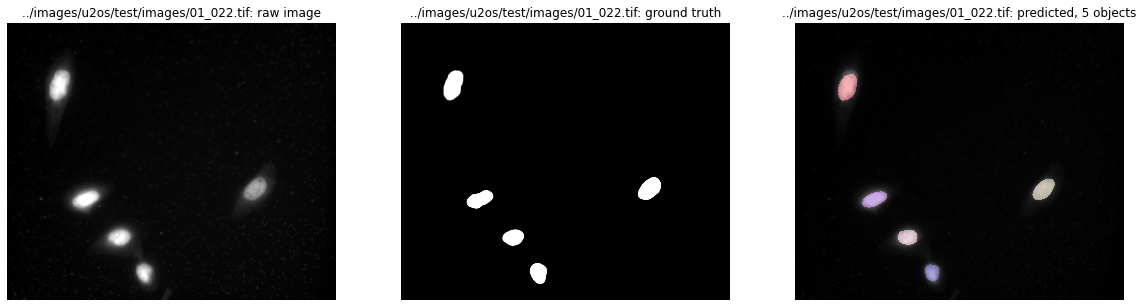

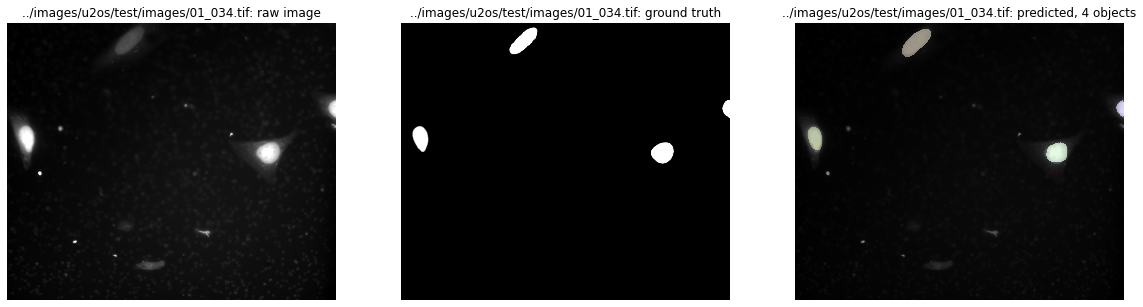

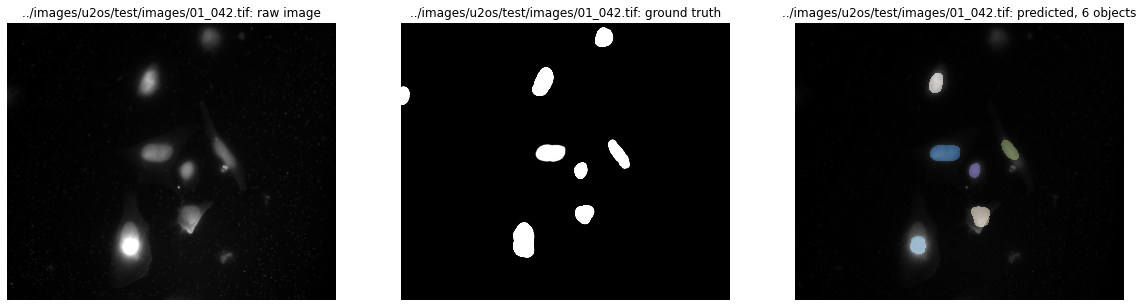

In [23]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [24]:
save_scores_csv(merfish_stats, '_intensity')

# Noise Augmenter

In [24]:
# Load from disk
noise_aug_merfish_model = StarDist2D(None, name='noise_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.663211, nms_thresh=0.3.


In [25]:
merfish_Y_pred = [noise_aug_merfish_model.predict_instances(x, n_tiles=noise_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:18<00:00, 17.35s/it]


In [26]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:19<00:00,  2.17s/it]


In [27]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=40, fn=3, precision=1.0, recall=0.9302325581395349, accuracy=0.9302325581395349, f1=0.963855421686747, n_true=43, n_pred=40, mean_true_score=0.7681641878893939, mean_matched_score=0.8257765019810984, panoptic_quality=0.7959291585359984, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=40, fn=3, precision=1.0, recall=0.9302325581395349, accuracy=0.9302325581395349, f1=0.963855421686747, n_true=43, n_pred=40, mean_true_score=0.7681641878893939, mean_matched_score=0.8257765019810984, panoptic_quality=0.7959291585359984, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=40, fn=3, precision=1.0, recall=0.9302325581395349, accuracy=0.9302325581395349, f1=0.963855421686747, n_true=43, n_pred=40, mean_true_score=0.7681641878893939, mean_matched_score=0.8257765019810984, panoptic_quality=0.7959291585359984, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=40, fn=3, precisio

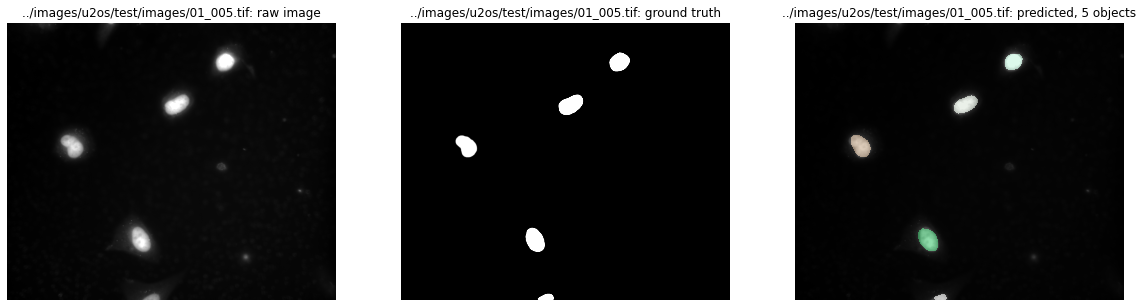

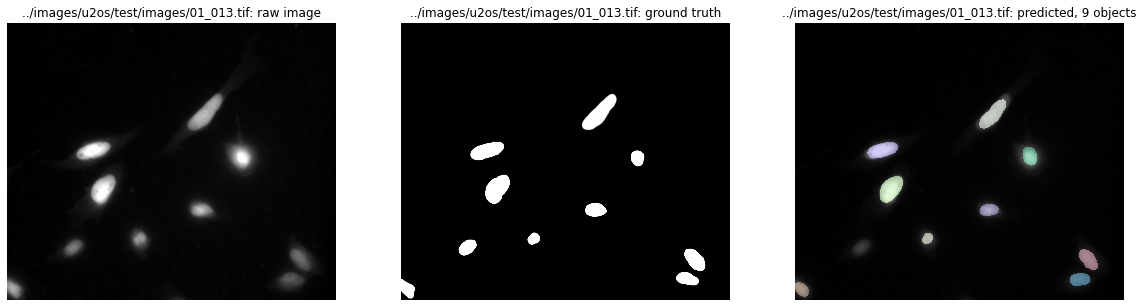

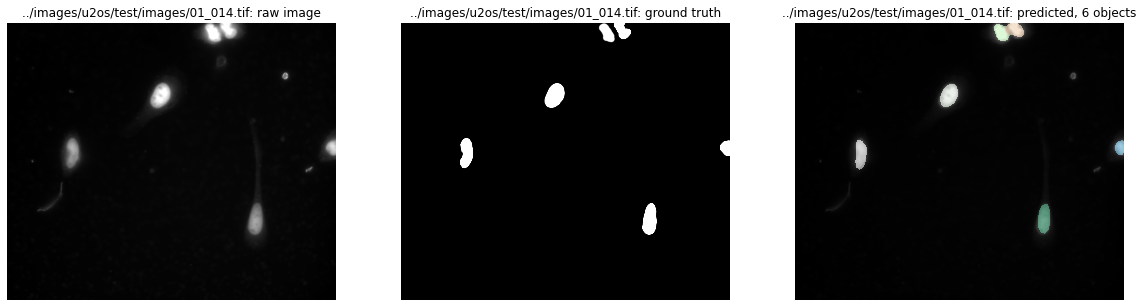

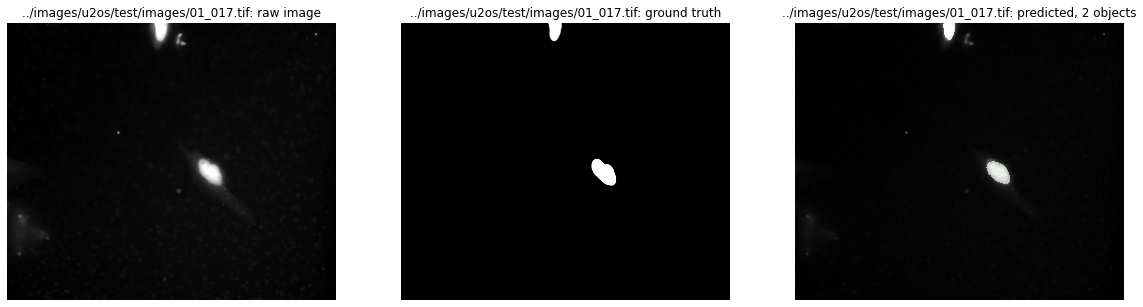

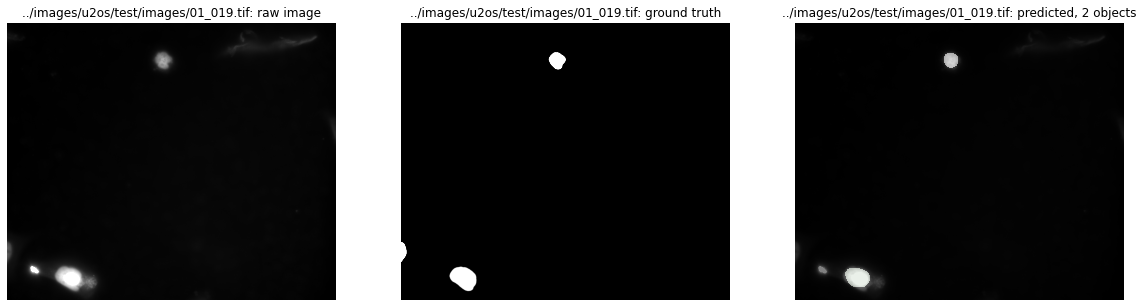

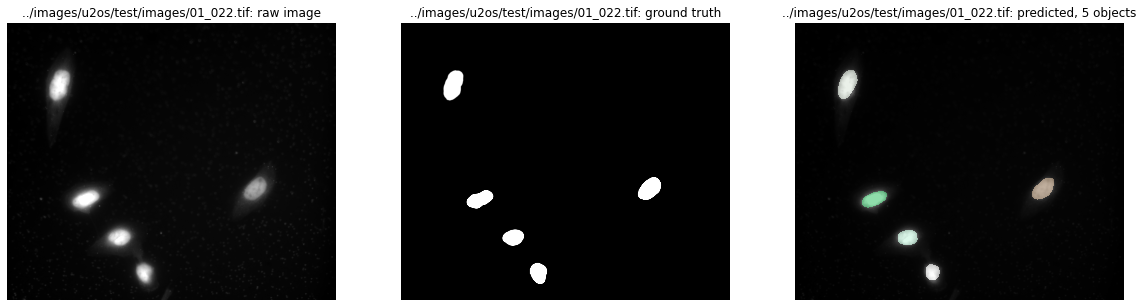

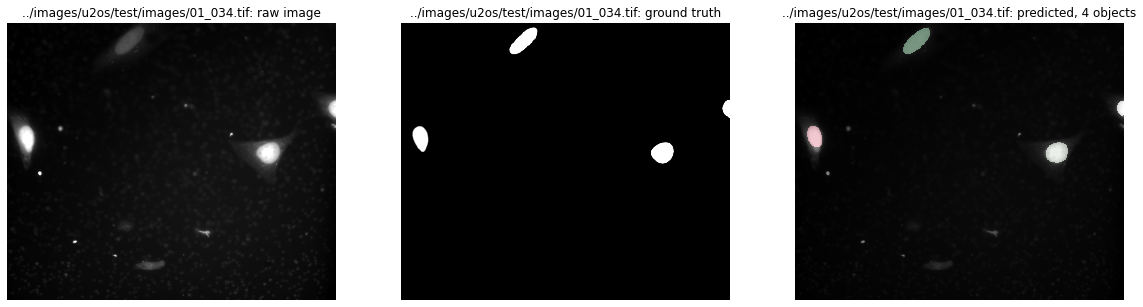

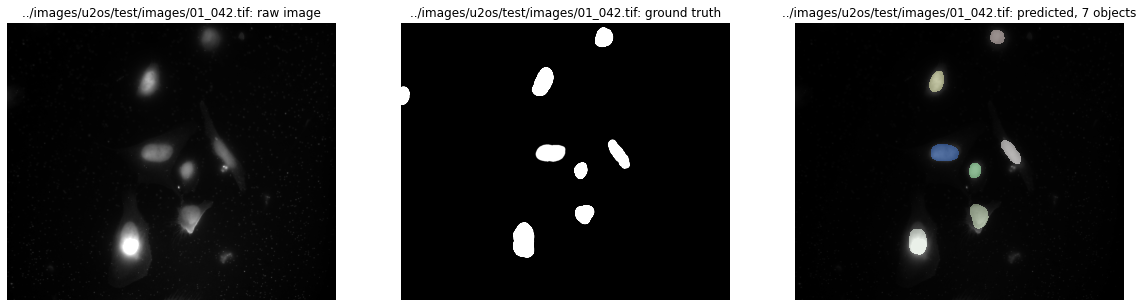

In [28]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [29]:
save_scores_csv(merfish_stats, '_noise')